# Disturbance Performance Visualization

In [9]:
import torch
import matplotlib.pyplot as plt
from Utils import ID_generator
plt.style.use("ggplot")

In [10]:
class ComparisonModel:
    def __init__(self, name='MGP-BDI', color='tomato', dir_path='/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result...'):
        self.color = color
        self.name = name
        self.dir_path = dir_path
        # e.g., dir_path = /Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0

    def test_results(self, ID):
        test_dataset = torch.load(self.dir_path + '/' + ID + '/_random/test_results.pickle')
        self.success_rate = test_dataset['success_rate']
        self.test_results= torch.stack(test_dataset['test_results']).float()*100
        self.success_rate['std'] = torch.stack([self.test_results[i*2:i*2+2].mean() for i in range(int(self.test_results.shape[0]/2))]).std()
        print(test_dataset.keys())

    def test_demo_results(self, ID):
        test_dataset = torch.load(self.dir_path + '/' + ID + '/test_demo_results.pickle')
        self.success_rate = test_dataset['success_rate']
        self.test_results= torch.stack(test_dataset['test_results']).float()*100
        self.success_rate['std'] = torch.stack([self.test_results[i*3:i*3+3].mean() for i in range(int(self.test_results.shape[0]/3))]).std()
        print(test_dataset.keys())

# ObstacleAvoidance

In [11]:
mhgp_bdi = ComparisonModel(name="MHGP-BDI",
color="tomato",
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0")
mhgp_bdi.test_demo_results(ID="0/20210908_201619")

mgp_bdi = ComparisonModel(name="MGP-BDI",
    color='navy',
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MGP-BDI/0")
mgp_bdi.test_demo_results(ID="0/20210908_201008")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [12]:
print(mhgp_bdi.success_rate)
print(mgp_bdi.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(40.), 'std': tensor(19.2450)}


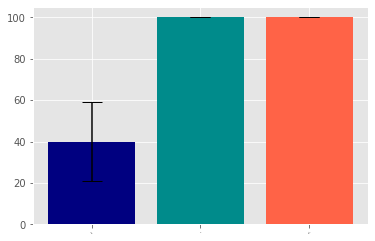

In [13]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(['Homo\nBDI'],[mgp_bdi.success_rate['mean']],yerr=mgp_bdi.success_rate['std'],capsize = 10,color=mgp_bdi.color)
bar_mhgp_bc = plt.bar(['BC'],[100.],yerr=0.,capsize = 10,color='darkcyan')
bar_mhgp_bdi = plt.bar(['Hetero\nBDI'],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/Obstacle_Avoidance/Disturbance_Performance/"+ID+".png")

# 

# ShaftInsertion

In [14]:
mhgp_bdi = ComparisonModel(name="MHGP-BDI",
color="tomato",
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BDI/0")
mhgp_bdi.test_demo_results(ID="2/20210908demo/20210908_181345demo/_random")

mgp_bdi = ComparisonModel(name="MGP-BDI",
    color='navy',
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MGP-BDI/0")
mgp_bdi.test_demo_results(ID="1/20210908_183147demo/_random")

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [15]:
print(mhgp_bdi.success_rate)
print(mgp_bdi.success_rate)

{'mean': tensor(80.), 'std': tensor(19.2450)}
{'mean': tensor(20.), 'std': tensor(19.2450)}


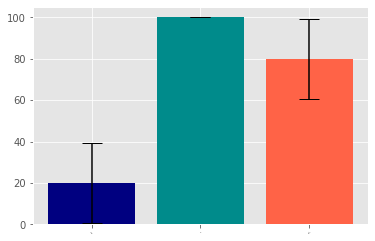

In [16]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(['Homo\nBDI'],[mgp_bdi.success_rate['mean']],yerr=mgp_bdi.success_rate['std'],capsize = 10,color=mgp_bdi.color)
bar_mhgp_bc = plt.bar(['BC'],[100.],yerr=0.,capsize = 10,color='darkcyan')
bar_mhgp_bdi = plt.bar(['Hetero\nBDI'],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/ShaftInsertion/Disturbance_Performance/"+ID+".png")